In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

In [13]:
with open('/shared/experiments/ssl-sandbox/image2vec/cifar10/ae/version_0/embeddings.json') as f:
    ae_data = json.load(f)
ae_data = pd.DataFrame(ae_data)

with open('/shared/experiments/ssl-sandbox/image2vec/cifar10/vae/version_0/embeddings.json') as f:
    vae_data = json.load(f)
vae_data = pd.DataFrame(vae_data)

with open('/shared/experiments/ssl-sandbox/image2vec/cifar10/simclr/version_0/embeddings.json') as f:
    simclr_data = json.load(f)
simclr_data = pd.DataFrame(simclr_data)

with open('/shared/experiments/ssl-sandbox/image2vec/cifar10/supervised/version_0/embeddings.json') as f:
    sup_data = json.load(f)
sup_data = pd.DataFrame(sup_data)

In [14]:
ae_x = np.array(list(ae_data['common_features']))
ae_y = ae_data['label'].values

vae_x = np.array(list(vae_data['common_features']))
vae_y = vae_data['label'].values

simclr_x = np.array(list(simclr_data['common_features']))
simclr_y = simclr_data['label'].values

sup_x = np.array(list(sup_data['common_features']))
sup_y = sup_data['label'].values

In [15]:
tsne = TSNE()

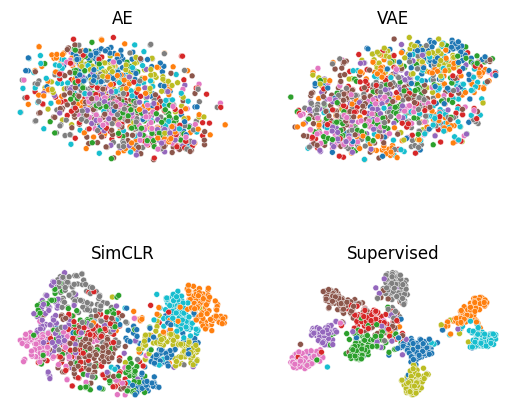

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=2)
plt.subplots_adjust(hspace=0.75)

for i, (x, y, title) in enumerate([(ae_x, ae_y, 'AE'),
                                   (vae_x, vae_y, 'VAE'),
                                   (simclr_x, simclr_y, 'SimCLR'),
                                   (sup_x, sup_y, 'Supervised')]):
    ax = axes[(i // 2), i % 2]
    x_2d = tsne.fit_transform(x)
    sns.scatterplot(
        x=x_2d[:, 0],
        y=x_2d[:, 1],
        hue=y,
        hue_order=[str(i) for i in range(10)],
        legend=None,
        ax=ax,
        size=3
    )
    ax.axis('off')
    ax.set_title(title)

plt.savefig('cifar10_tsne.pdf')